# Introduction

Here we try to predict the strength of concrete using a MLP and compare it with the performance of a linear regressor.

Dataset:
https://www.kaggle.com/datasets/prathamtripathi/regression-with-neural-networkinG 

On this dataset the MLP used and parametrized as in the follows performs significantly better compared to a multi-variate linear regressor.


# Download and read in the dataset

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prathamtripathi/regression-with-neural-networking")

print("Path to dataset files:", path)

Path to dataset files: /home/juebrauer/.cache/kagglehub/datasets/prathamtripathi/regression-with-neural-networking/versions/1


In [2]:
path

'/home/juebrauer/.cache/kagglehub/datasets/prathamtripathi/regression-with-neural-networking/versions/1'

In [3]:
!ls {path}

concrete_data.csv


In [4]:
import pandas
df = pandas.read_csv(path + "/concrete_data.csv")
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


# Data (Feature) Understanding

| Feature name | Description |
|-------------|-------------|
| Cement | Amount of cement used in the concrete mix |
| Blast Furnace Slag | By-product from steel production used as a supplementary cementitious material |
| Fly Ash | Fine residue from coal combustion that improves concrete properties |
| Water | Amount of water in the concrete mix |
| Super-plasticizer | Chemical admixture used to increase workability without adding more water |
| Coarse Aggregate | Large aggregate particles such as gravel or crushed stone |
| Fine Aggregate | Fine aggregate particles such as sand |
| Age | Age of the concrete in days at the time of strength testing |
| Strength of the Cement | Compressive strength of the concrete (target variable) |


# Predict concrete strength with MLP vs. linear regressor

2025-12-30 08:21:33.750948: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-30 08:21:33.782668: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-12-30 08:21:34.500427: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
/home/juebrauer/miniconda3/envs/env_teaching/lib/python3.12

Path to dataset files: /home/juebrauer/.cache/kagglehub/datasets/prathamtripathi/regression-with-neural-networking/versions/1


2025-12-30 08:21:35.011750: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2025-12-30 08:21:35.011773: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:160] env: CUDA_VISIBLE_DEVICES="-1"
2025-12-30 08:21:35.011778: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:163] CUDA_VISIBLE_DEVICES is set to -1 - this hides all GPUs from CUDA
2025-12-30 08:21:35.011780: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:171] verbose logging is disabled. Rerun with verbose logging (usually --v=1 or --vmodule=cuda_diagnostics=1) to get more diagnostic output from this module
2025-12-30 08:21:35.011783: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:176] retrieving CUDA diagnostic information for host: if-srv-deepl02
2025-12-30 08:21:35.011785: I external/local_xla/xla/stream_executor/cud

Model: "ConcreteStrengthPredictor"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden1 (Dense)                 │ (None, 40)             │           360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden2 (Dense)                 │ (None, 20)             │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden3 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,401 (5.47 KB)

 Trainable params: 1,401 (5.47 KB)

 Non-trainable params: 0 (0.00 B)

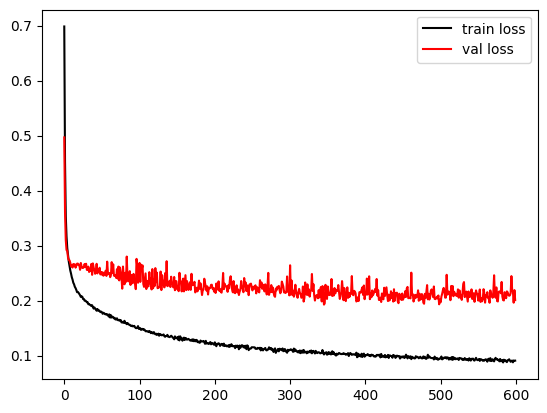

MAPE MLP: 10.73%

Comparing with dummy baseline ...
MAPE dummy baseline: 49.20%
MLP is 38.47% better compared to dummy baseline

Comparing with multi-variate linear regression ...
MAPE Linear Regression: 17.97%
Difference MAPE LR - MAPE MLP: 7.23%


In [6]:
# Deactivate TensorFlow GPU support 
# since TF/Keras seems not to support the new RTX PRO 6000 Blackwell (Compute Capability 12.0)
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"   # GPU deaktivieren

import random
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import kagglehub

# For reproducible results (starting with the same MLP)
SEED = 1
random.seed(SEED)
np.random.seed(SEED)
tf.random.set_seed(SEED)


# 1. Read in the dataset
path = kagglehub.dataset_download("prathamtripathi/regression-with-neural-networking")
print("Path to dataset files:", path)
df = pandas.read_csv(path + "/concrete_data.csv")

# 2. Define inputs-/outputs for the model
target_feature = "Strength"
x = df.drop(target_feature, axis="columns")
y = df[ [target_feature] ]

# 3. Split example data into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# 4. Scale the data (important for MLPs!)
s_input = PowerTransformer()
s_output = PowerTransformer()
s_input.fit(x_train.values)
s_output.fit(y_train.values)
x_train_scaled = s_input.transform(x_train.values)
y_train_scaled = s_output.transform(y_train.values)

# 5. Build up a MLP and train it
nr_inputs = len(x_train.columns)
model = tf.keras.Sequential(name="ConcreteStrengthPredictor")
model.add( tf.keras.layers.InputLayer(shape=(nr_inputs,) ) )
model.add( tf.keras.layers.Dense(40, activation="relu", name="hidden1") )
model.add( tf.keras.layers.Dense(20, activation="relu", name="hidden2") )
model.add( tf.keras.layers.Dense(10, activation="relu", name="hidden3") )
model.add( tf.keras.layers.Dense(1, name="output") )
model.compile(optimizer="rmsprop", loss="mae")
model.summary()
h = model.fit(x_train_scaled, y_train_scaled, validation_split=0.1, epochs=600, verbose=0)
plt.plot(h.history["loss"], color="black", label="train loss")
plt.plot(h.history["val_loss"], color="red", label="val loss")
plt.legend()
plt.show()

# 7. Test model on test data
x_test_scaled = s_input.transform(x_test.values)
preds_scaled = model.predict(x_test_scaled, verbose=0)
preds_unscaled = s_output.inverse_transform(preds_scaled)
MAPE = mean_absolute_percentage_error(y_test, preds_unscaled.flatten()) * 100
print(f"MAPE MLP: {MAPE:.2f}%")

# 8. Compare MLP with dummy baseline
print("\nComparing with dummy baseline ...")
preds_baseline = [y_train[target_feature].mean()] * len(x_test)
MAPE_dummy_baseline = mean_absolute_percentage_error(y_test, preds_baseline) * 100
print(f"MAPE dummy baseline: {MAPE_dummy_baseline:.2f}%")
print(f"MLP is {MAPE_dummy_baseline - MAPE:.2f}% better compared to dummy baseline")

# 9. Compare with multi-variate linear regression
print("\nComparing with multi-variate linear regression ...")
lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled, y_train_scaled)
preds_lr_scaled = lin_reg.predict(x_test_scaled)
preds_lr = s_output.inverse_transform(preds_lr_scaled)
MAPE_lr = mean_absolute_percentage_error(y_test, preds_lr) * 100
print(f"MAPE Linear Regression: {MAPE_lr:.2f}%")
print(f"Difference MAPE LR - MAPE MLP: {MAPE_lr - MAPE:.2f}%")
